<a href="https://www.kaggle.com/code/mikedelong/i-hope-you-like-california-scatter-plots?scriptVersionId=250265238" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv(filepath_or_buffer='/kaggle/input/housingdata/housing2 (1).csv')
df['Households'] = df['households'].apply(func=lambda x: x if not isinstance(x, str) else  float(x) if x.isnumeric() else np.nan)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender,Households
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male,126.0
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female,1138.0
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male,177.0
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female,219.0
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male,259.0


Let's make some scatter plots to visualize our different features geographically.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='longitude', ylabel='latitude'>

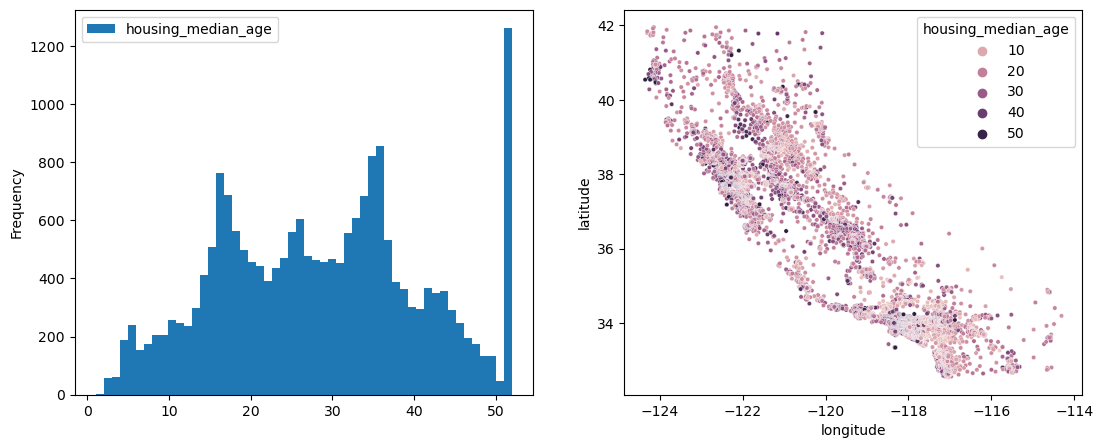

In [2]:
import warnings
from matplotlib.pyplot import subplots
from seaborn import scatterplot

warnings.filterwarnings(action='ignore', category=UserWarning)
fig, ax = subplots(ncols=2, figsize=(13, 5))
df[['housing_median_age']].plot.hist(bins=52, ax=ax[0])
scatterplot(data=df, x='longitude', y='latitude', hue='housing_median_age', s=10, ax=ax[1])

That's an odd-looking distribution, with three modes; that rightmost mode looks especially odd. Guessing the units are years here; and the rightmost bin must be the older-than bin.

<Axes: xlabel='longitude', ylabel='latitude'>

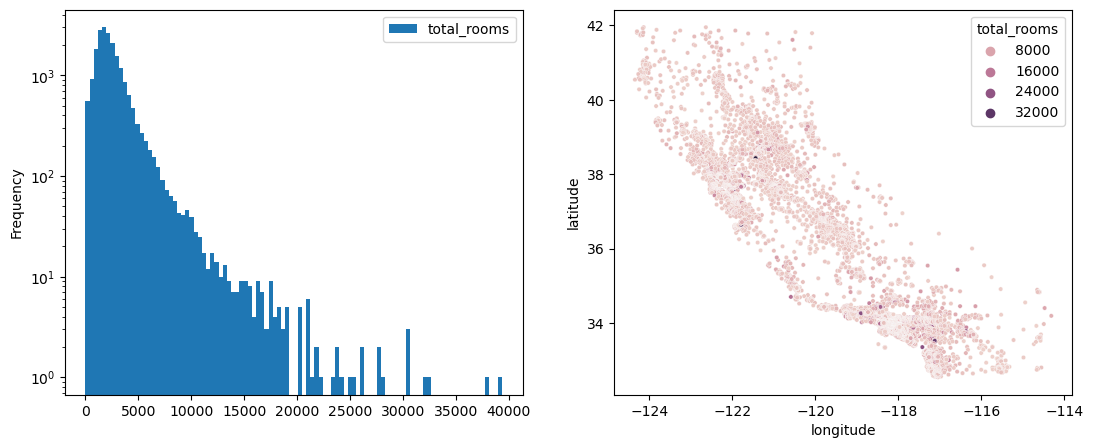

In [3]:
fig, ax = subplots(ncols=2, figsize=(13, 5))
df[['total_rooms']].plot.hist(ax=ax[0], bins=100, log=True)
scatterplot(ax=ax[1], data=df, x='longitude', y='latitude', hue='total_rooms', s=10)

No clue what the total rooms signify, but the cluster so tightly and the outliers are so far from the mean we use a log plot.

<Axes: xlabel='longitude', ylabel='latitude'>

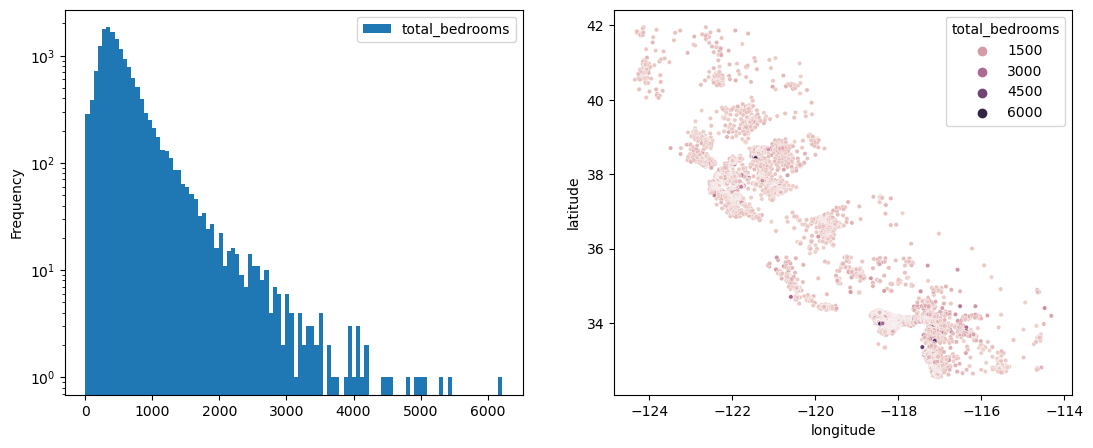

In [4]:
fig, ax = subplots(ncols=2, figsize=(13, 5))
df[['total_bedrooms']].plot.hist(ax=ax[0], bins=100, log=True)
scatterplot(ax=ax[1], data=df, x='longitude', y='latitude', hue='total_bedrooms', s=10)

<Axes: xlabel='longitude', ylabel='latitude'>

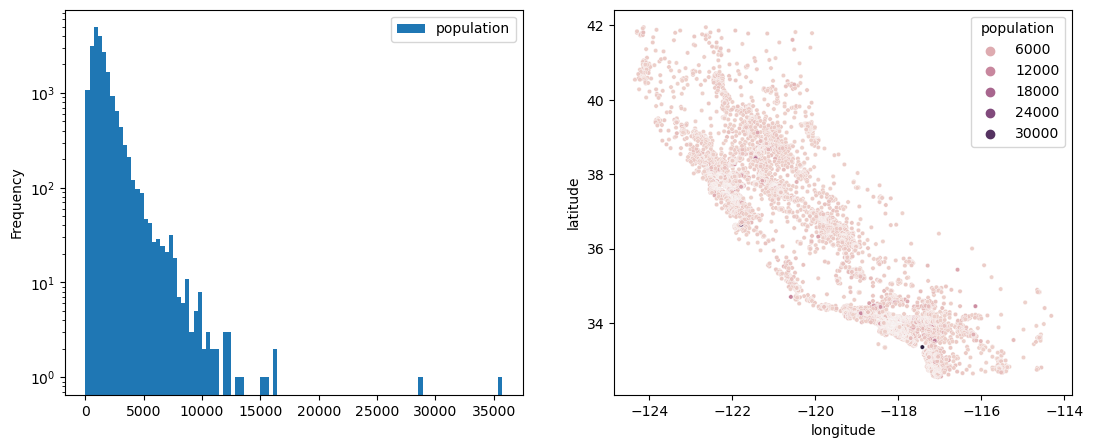

In [5]:
fig, ax = subplots(ncols=2, figsize=(13, 5))
df[['population']].plot.hist(ax=ax[0], bins=100, log=True)
scatterplot(ax=ax[1], data=df, x='longitude', y='latitude', hue='population', s=10)

<Axes: xlabel='longitude', ylabel='latitude'>

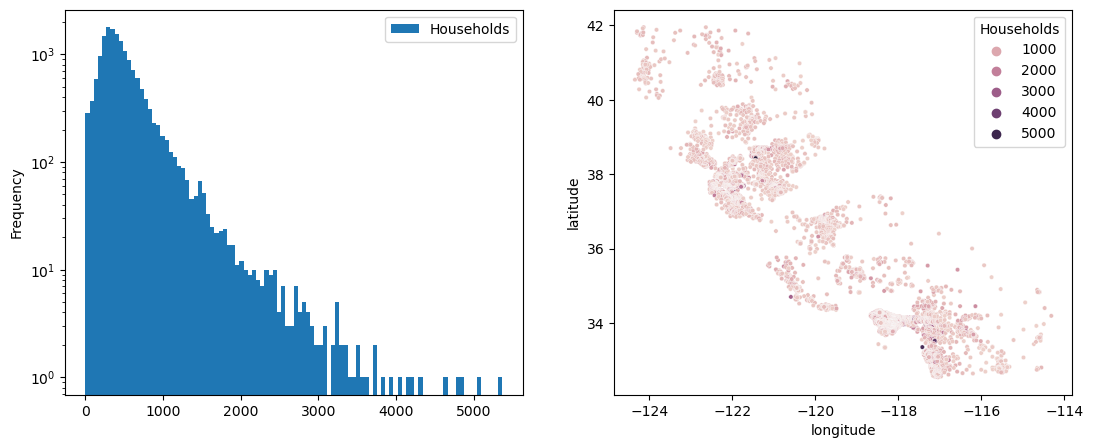

In [6]:
fig, ax = subplots(ncols=2, figsize=(13, 5))
df[['Households']].plot.hist(ax=ax[0], bins=100, log=True)
scatterplot(ax=ax[1], data=df, hue='Households', s=10, x='longitude', y='latitude', )

<Axes: xlabel='longitude', ylabel='latitude'>

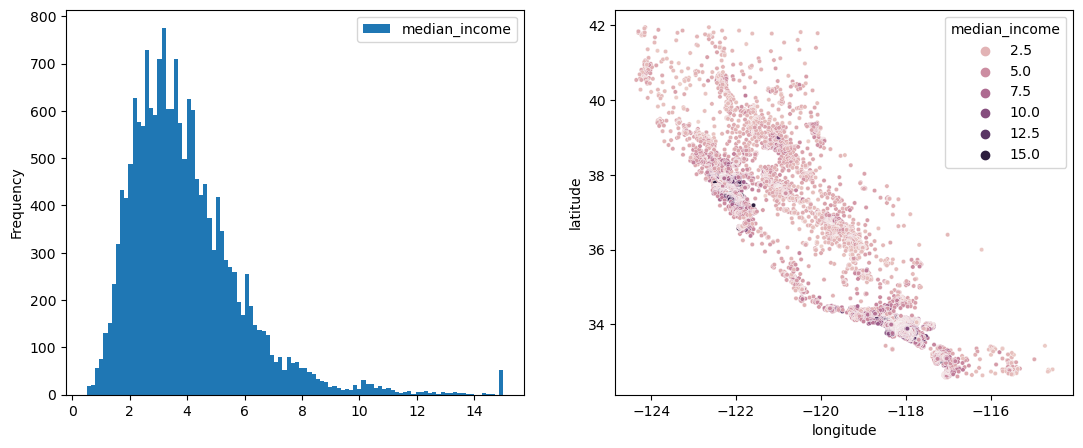

In [7]:
fig, ax = subplots(ncols=2, figsize=(13, 5))
df[['median_income']].plot.hist(ax=ax[0], bins=100, log=False)
scatterplot(ax=ax[1], data=df, hue='median_income', s=10, x='longitude', y='latitude', )

<Axes: xlabel='longitude', ylabel='latitude'>

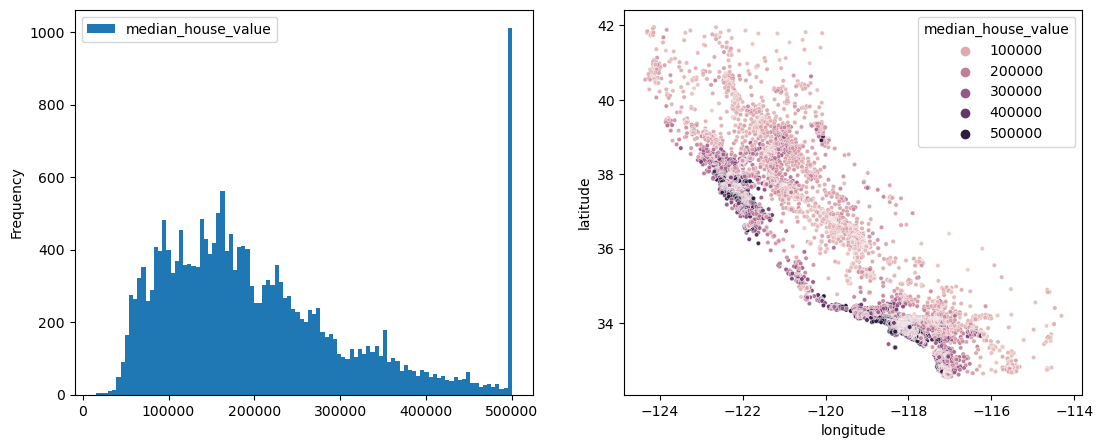

In [8]:
fig, ax = subplots(ncols=2, figsize=(13, 5))
df[['median_house_value']].plot.hist(ax=ax[0], bins=100, log=False)
scatterplot(ax=ax[1], data=df, hue='median_house_value', s=10, x='longitude', y='latitude', )

<Axes: xlabel='longitude', ylabel='latitude'>

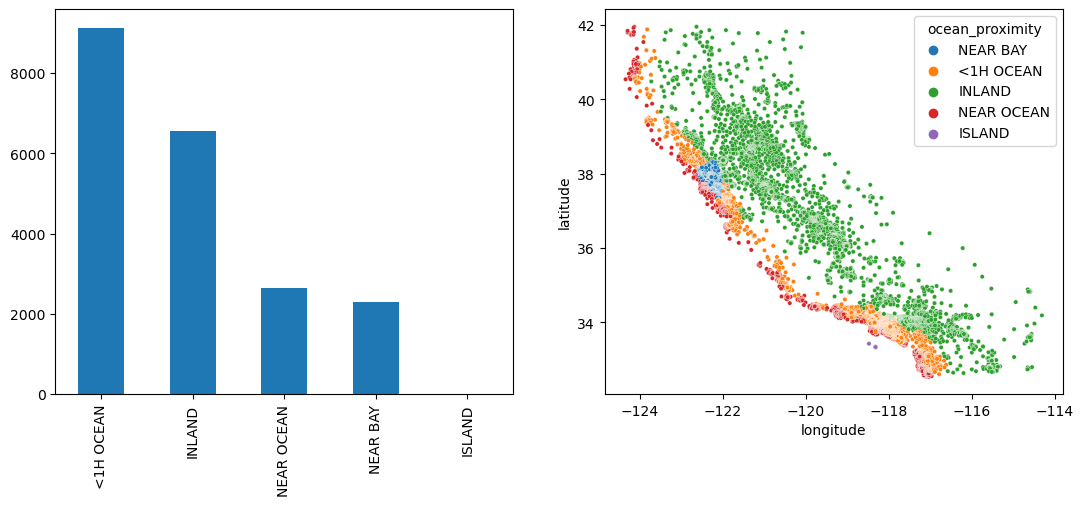

In [9]:
fig, ax = subplots(ncols=2, figsize=(13, 5))
df['ocean_proximity'].value_counts().plot(ax=ax[0], kind='bar')
scatterplot(ax=ax[1], data=df, hue='ocean_proximity', s=10, x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

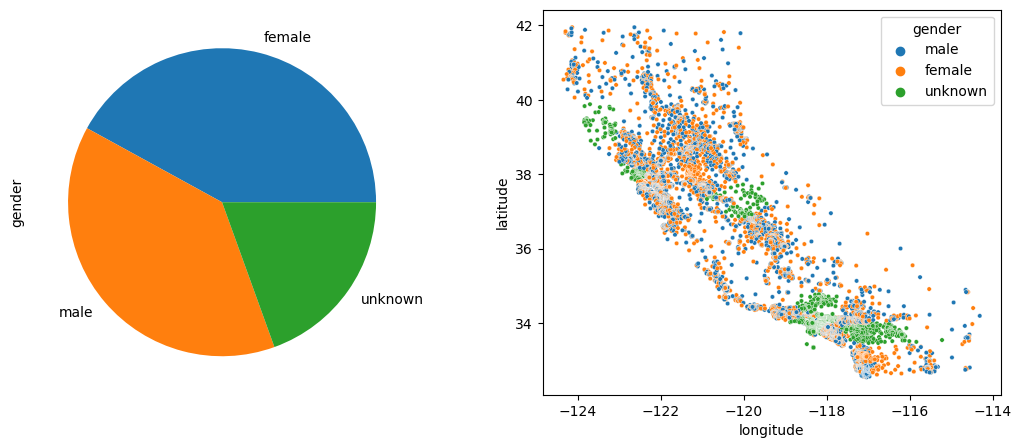

In [10]:
fig, ax = subplots(ncols=2, figsize=(13, 5))
df['gender'].fillna('unknown').value_counts().plot(ax=ax[0], kind='pie')
scatterplot(ax=ax[1], data=df[['longitude', 'latitude', 'gender']].fillna(value='unknown'), x='longitude', y='latitude', hue='gender', s=10)

Weird how the unknown gender values seem to cluster.

<Axes: >

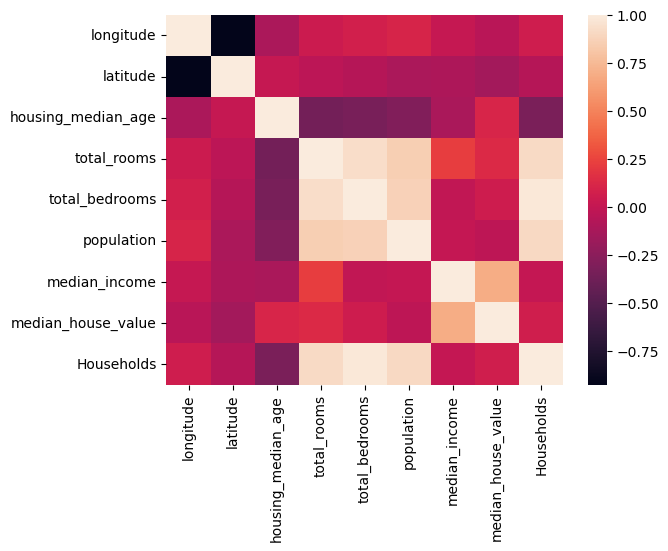

In [11]:
from seaborn import heatmap
heatmap(data=df.corr(numeric_only=True))

The correlations here are high enough that we would expect to be able to build a pretty simple linear model that predicts price pretty well.

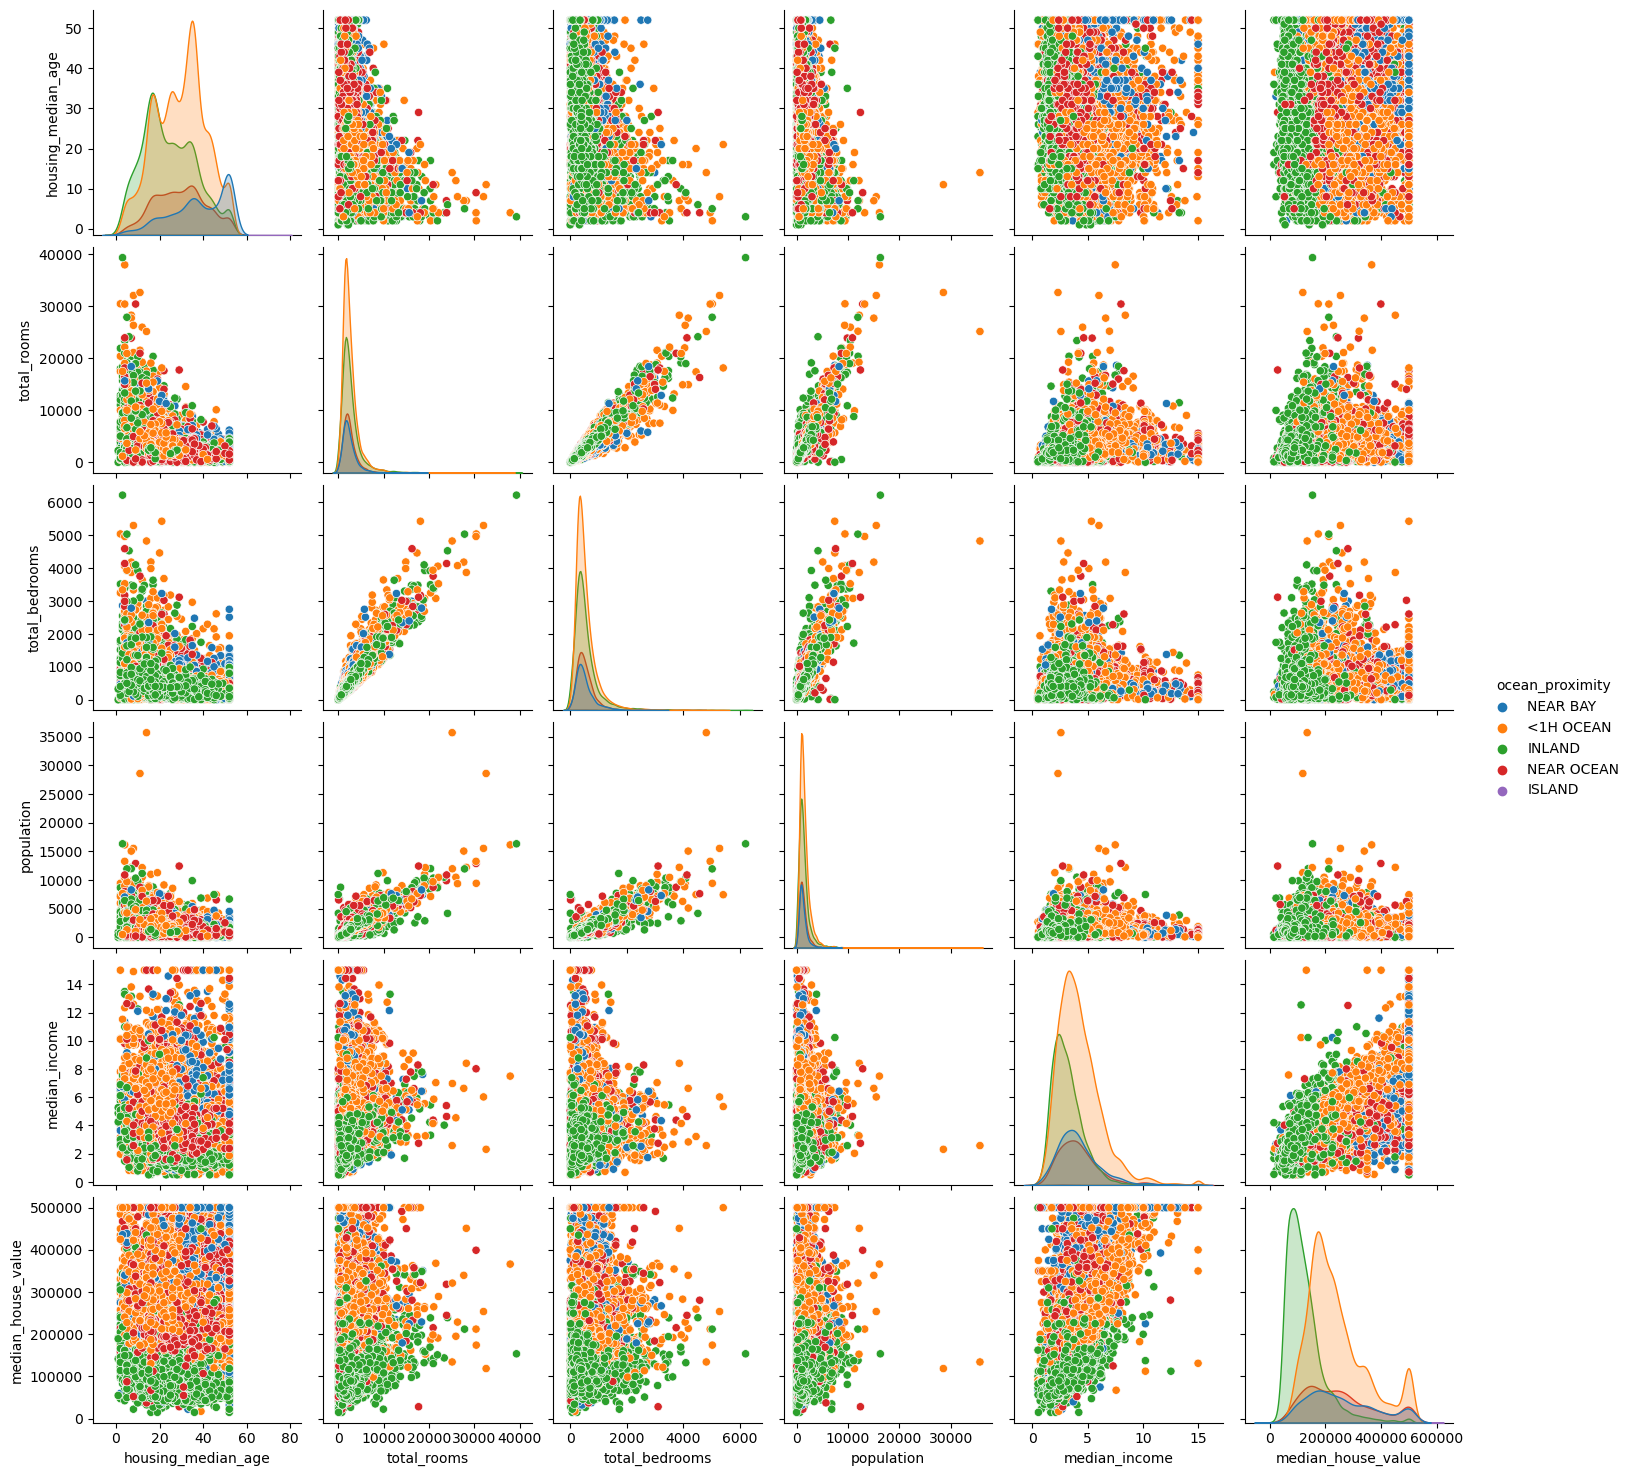

In [12]:
from seaborn import pairplot
warnings.filterwarnings(action='ignore', category=UserWarning)

pairplot_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income','median_house_value', 'ocean_proximity']
pairplot(data=df[pairplot_columns], hue='ocean_proximity')